In [4]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


videos = list(Path("../data/clips").glob("**/*.mp4"))
video = videos[0]

In [74]:
def get_frames(cap):
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        yield frame


def get_subset(img):
    img = img[600:700, :500]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 255 * 0.9, 255, cv2.THRESH_BINARY)[1]
    # lets also flood fill the background with white starting at the bottom left
    cv2.floodFill(img, None, (0, 0), 255)
    # invert so text is 255
    img = cv2.bitwise_not(img)
    return img


cap = cv2.VideoCapture(video.as_posix())
frames = []
for frame in tqdm(get_frames(cap)):
    subset = get_subset(frame)
    frames.append(subset)

249it [00:00, 801.08it/s]


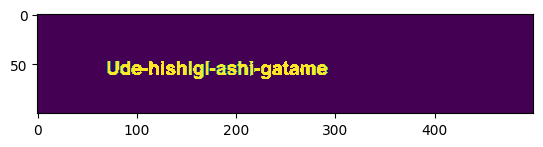

In [75]:
plt.imshow(frames[25])
plt.show()

In [76]:
import pytesseract

pytesseract.image_to_string(frames[25]).strip()

'Ude-hishigl-ashi-gatame'

In [77]:
whitelist = "abcdefghijklmnopqrstuvwxyz" + "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + "-:"

res = []
for video in tqdm(videos):
    cap = cv2.VideoCapture(video.as_posix())
    for i, frame in enumerate(get_frames(cap)):
        if i > 3:
            subset = get_subset(frame)
            break
    ocr = pytesseract.image_to_string(
        subset, config=f"-c tessedit_char_whitelist={whitelist} --psm 6"
    )
    res.append((video, ocr, subset, frame))
    cap.release()

100%|██████████| 108/108 [00:10<00:00, 10.37it/s]


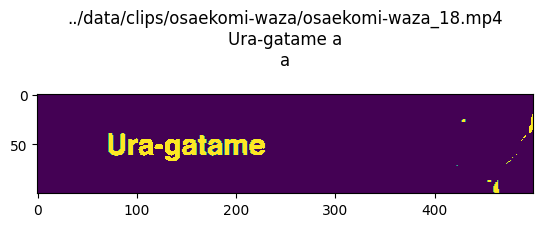

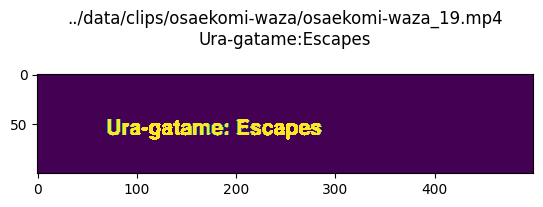

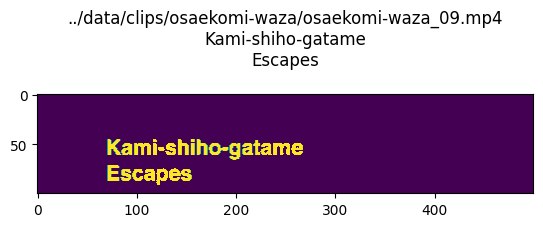

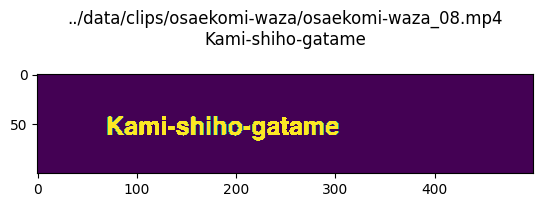

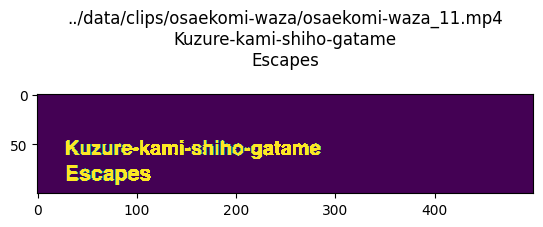

In [78]:
for path, ocr, frame, orig in res[:5]:
    plt.imshow(frame)
    plt.title(f"{path}\n{ocr}")
    plt.show()

In [81]:
# create a final mapping that we can dump out yaml information
data = []
for path, ocr, frame, orig in sorted(res, key=lambda x: x[0]):
    data.append(
        {
            "path": path.relative_to("../data/clips").as_posix(),
            "ocr": ocr.strip().lower().replace("\n", " "),
        }
    )

for row in data:
    print("{}\t{}".format(row["path"], row["ocr"]))

ashi-waza/ashi-waza_00.mp4	de-ashi-harai
ashi-waza/ashi-waza_01.mp4	hiza-guruma
ashi-waza/ashi-waza_02.mp4	sasae-tsurikomi-ashi
ashi-waza/ashi-waza_03.mp4	o-soto-gari
ashi-waza/ashi-waza_04.mp4	o-uchi-gari
ashi-waza/ashi-waza_05.mp4	ko-soto-gari
ashi-waza/ashi-waza_06.mp4	ko-uchi-gari
ashi-waza/ashi-waza_07.mp4	okuri-ashi-harai
ashi-waza/ashi-waza_08.mp4	uchi-mata
ashi-waza/ashi-waza_09.mp4	ko-soto-gake
ashi-waza/ashi-waza_10.mp4	ashi-guruma
ashi-waza/ashi-waza_11.mp4	harai-tsurikomi-ashi
ashi-waza/ashi-waza_12.mp4	o-guruma
ashi-waza/ashi-waza_13.mp4	o-soto-guruma
ashi-waza/ashi-waza_14.mp4	tsubame-gaeshi
ashi-waza/ashi-waza_15.mp4	o-soto-gaeshi
ashi-waza/ashi-waza_16.mp4	o-uchi-gaeshi
ashi-waza/ashi-waza_17.mp4	hane-goshi-gaeshi
ashi-waza/ashi-waza_18.mp4	harai-goshi-gaeshi
ashi-waza/ashi-waza_19.mp4	uchi-mata-gaeshi
kansetsu-waza/kansetsu-waza_00.mp4	ude-garami
kansetsu-waza/kansetsu-waza_01.mp4	ude-hishigi-juji-gatame
kansetsu-waza/kansetsu-waza_02.mp4	ude-hishigi-ude-gatame
kansets